# 噂の拡散のシミュレーション（スケールフリーネットワーク）

・スケールフリー性を持つネットワークの作成<br>
・噂の拡散のシミュレーション<br>
・病気の拡散のシミュレーション


NetworkX
https://networkx.org/documentation/stable/index.html

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#### グラフの基本的な書き方
ネットワークの作成：スケールフリーネットワークを作成するためにbarabasi_albert_graphを使用（nはノード数，mは新たにノードを追加するときのエッジの数）<br>
レイアウトの設定：ノード間が等距離に近くかつエッジが交差しないように配置するためにkamada_kawai_layoutを使用<br>
グラフの描画：ネットワークを設定したレイアウトで描画

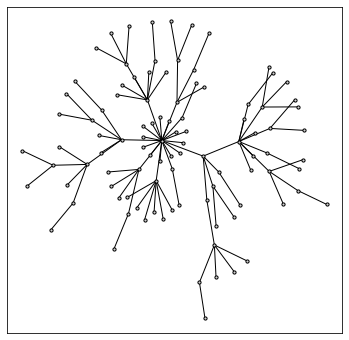

In [2]:
G = nx.barabasi_albert_graph(n = 100, m=1)
pos = nx.kamada_kawai_layout(G)
plt.subplots(figsize=(6, 6))
nx.draw_networkx(G, pos,node_color="lightgray", edgecolors='k', node_size=10, with_labels=False)

#### ノード数の変更
ノード数を1000に変更

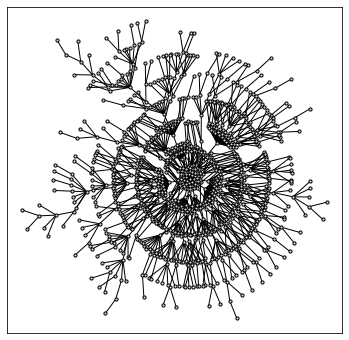

In [3]:
G = nx.barabasi_albert_graph(n = 1000, m=1)
pos = nx.kamada_kawai_layout(G)
plt.subplots(figsize=(6, 6))
nx.draw_networkx(G, pos,node_color="lightgray", edgecolors='k', node_size=10, with_labels=False)

#### 次数と次数分布の関係
ヒストグラムを用いて次数をまとめる

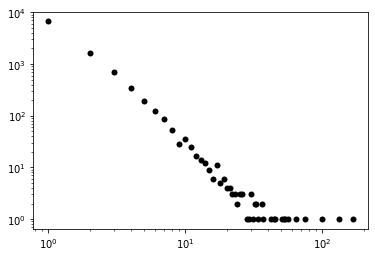

In [4]:
G = nx.barabasi_albert_graph(n = 10000, m=1)
dg_hist=nx.degree_histogram(G)
#print(dg_hist)
plt.loglog(dg_hist,marker="o",markerfacecolor='k',markeredgecolor='None',linestyle='None')

#### ノード数の変更したときの次数と次数分布の関係
ノード数を100，1000，10000，100000，1000000に変更したときの次数分布

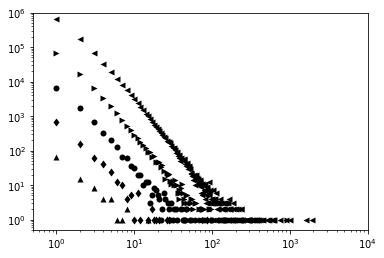

In [5]:
mk = ['^', 'd', 'o', '>', '<']
plt.xlim(0.5, 10**4)
plt.ylim(0.5, 10**6)
for num in range(5):
    G = nx.barabasi_albert_graph(n = 100*(10**num), m=1)
    dg_hist=nx.degree_histogram(G)
    plt.loglog(dg_hist,marker=mk[num],markerfacecolor='k',markeredgecolor='None',linestyle='None')

#### 平均次数の変更したときの次数と次数分布の関係
平均次数を1，5，20に変更したときの次数分布

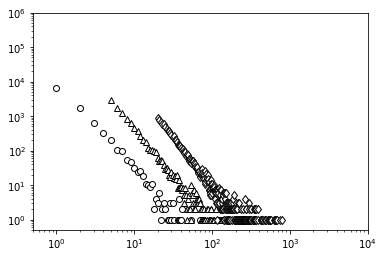

In [6]:
mk = ['o','^', 'd', '>', '<']
m = [1,5,20]
plt.xlim(0.5, 10**4)
plt.ylim(0.5, 10**6)
for num in range(3):
    G = nx.barabasi_albert_graph(n = 10000, m=m[num])
    dg_hist=nx.degree_histogram(G)
    plt.loglog(dg_hist,marker=mk[num],markerfacecolor='w',markeredgecolor='k',linestyle='None')

#### 噂の拡散シミュレーション（SIモデル）
噂の拡散をシミュレーションして、アニメーションで表示

In [7]:
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import copy
import random

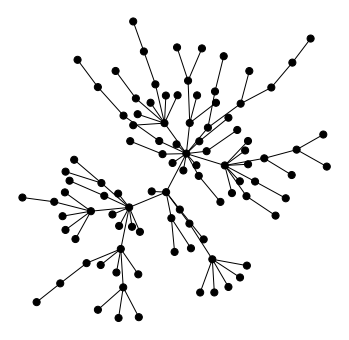

In [8]:
G = nx.barabasi_albert_graph(n = 100, m=1)
pos = nx.kamada_kawai_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
plot_data = []

#color_list = ["b", "r", "g", "c", "m", "y"]#カラーで表示する場合
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

def update(k):
    global nc, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data.append(sum(nc)/nx.number_of_nodes(G))
    if len(plot_data)==1:return
    nctmp = copy.copy(nc)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
    nc = copy.copy(nctmp)

ani = animation.FuncAnimation(fig, update, interval = 1, frames = 30, repeat=False)
HTML(ani.to_jshtml())

#### 噂の拡散の時系列グラフ
噂の拡散をシミュレーションして、噂を知っている人をプロット

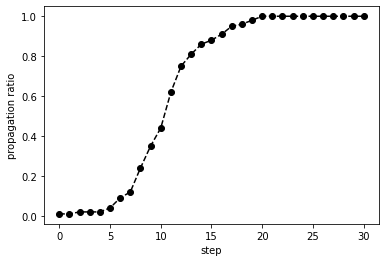

In [9]:
plt.xlabel("step")
plt.ylabel("propagation ratio")
plt.plot(plot_data, marker="o", color = "k", linestyle = "--")
plt.show()

#### 病気の拡散シミュレーション（SIRモデル）
未感染者、感染者に加えて回復者を含めた病気の拡散をシミュレーションして、アニメーションで表示

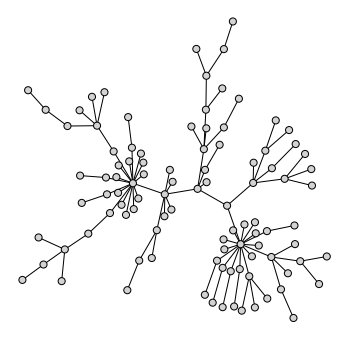

In [10]:
G = nx.barabasi_albert_graph(n = 100, m=1)
pos = nx.kamada_kawai_layout(G)

num = nx.number_of_nodes(G)
nc = np.zeros(nx.number_of_nodes(G), dtype=int)
nc[num-1] = 1
nt = np.zeros(nx.number_of_nodes(G), dtype=int)
nt[num-1] = 10
plot_data1 = []
plot_data2 = []

#color_list = ["b", "r", "g", "c", "m", "y"]
color_list = ["w", "k", "lightgrey", "c", "m", "y"]

fig = plt.figure(figsize = (6, 6)) 

def update(k):
    global nc, nt, G
    plt.cla()
    plt.axis('off')
    colors = [color_list[x] for x in nc]
    nx.draw_networkx(G, pos, node_color=colors, edgecolors='k', node_size=50, with_labels=False)
    plot_data1.append(np.count_nonzero(nc==1))
    plot_data2.append(np.count_nonzero(nc==2))
    if len(plot_data1)==1:return
    for n0 in range(nx.number_of_nodes(G)):
        if nt[n0] > 0:
            nt[n0] -= 1
            if nt[n0] == 0:
                nc[n0] = 2
    nctmp = copy.copy(nc)
    nttmp = copy.copy(nt)
    for n0 in range(nx.number_of_nodes(G)):
        for n1 in list(nx.neighbors(G, n0)):
            if nc[n0] == 1 and nc[n1] ==0 and random.random()<0.5:
                nctmp[n1] = 1
                nttmp[n1] = 10
    nc = copy.copy(nctmp)
    nt = copy.copy(nttmp)

ani = animation.FuncAnimation(fig, update, interval = 1, frames = 50, repeat=False)
HTML(ani.to_jshtml())


#### 病気の拡散の時系列グラフ
病気の拡散をシミュレーションして、感染者と回復者をプロット

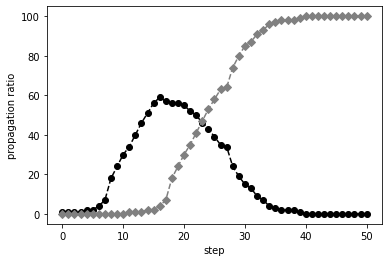

In [11]:
plt.xlabel("step")
plt.ylabel("propagation ratio")
plt.plot(plot_data1, marker="o", color = "k", linestyle = "--")
plt.plot(plot_data2, marker="D", color = "gray", linestyle = "--")
plt.show()